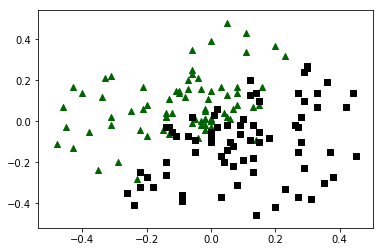

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
baseDados = pd.read_csv('data/base_regressao_logistica.csv')
plt.scatter(baseDados.X1[baseDados.Y == 0], baseDados.X2[baseDados.Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[baseDados.Y == 1], baseDados.X2[baseDados.Y == 1], c = 'black', marker = ',')

<h2 style="text-align:center; margin:40px"> Naive Bayes </h2>

![](img/bayes.png)

O <b>Naive Bayes</b> é um classificador (e somente classificador) que calcula probabilidades baseado nas frequências relativas das observações, utilizando uma <b>simplificação do Teorema de Bayes</b>.

<h3 style="text-align:center; margin:40px"> Teorema de Bayes </h3>

$$ P(A\,|\,B) = \frac{P(B\,|\,A)P(A)}{P(B)} $$

<h3 style="text-align:center; margin:40px"> Aplicando em Machine Learning... </h3>

$$ P(Y=C\,|\,X) = \frac{P(X\,|\,Y=C)P(Y=C)}{P(X)} $$

<h3 style="text-align:center; margin:40px"> P(X) pode ser considerado constante!! </h3>

$$ P(Y=C\,|\,X) \approx P(X\,|\,Y=C)P(Y=C) $$

<h3 style="text-align:center; margin:40px"> Vamos assumir que cada $X_i$ é independente? </h3>

$$ P(Y=C\,|\,X) \approx P(Y=C) \prod_{i=1}^{N} P(X_i\,|\,Y=C)$$

<h3 style="text-align:center; margin:40px"> Exemplo prático - Jogar Tennis </h3>

![](img/tennis1.png)

<h3 style="text-align:center; margin:40px"> Aplicando a fórmula </h3>

$$ P(Decisão\,|\,X) \approx P(Decisão)*P(X\,|\,Decisão)$$

$$ P(Decisão\,|\,X) \approx P(Decisão)*P(Aspecto\,|\,Decisão)*P(Temperatura\,|\,Decisão)*P(Umidade\,|\,Decisão)*P(Vento\,|\,Decisão)$$

$$ P(Decisão = N) = \frac{5}{14} = 0.3571$$

$$ P(Decisão = S) = \frac{9}{14} = 0.6428$$

![](img/tennis2.png)

![](img/tennis3.png)

$$ P(Decisão=N\,|\,X)=0.36*0.60*0.20*0.80*0.60=0.0207 $$

$$ P(Decisão=S\,|\,X)=0.64*0.22*0.33*0.33*0.33=0.0050 $$

<h3 style="text-align:center; margin:40px"> Conclusão : Não jogar tennis! </h3>

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn).

In [2]:
from sklearn.naive_bayes import GaussianNB

In [3]:
NB = GaussianNB()
X = baseDados.loc[:, baseDados.columns != 'Y']
Y = baseDados.Y
NB.fit(X,Y)

GaussianNB(priors=None)

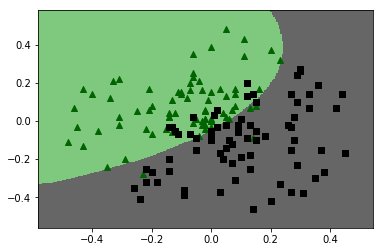

In [4]:
x_min, x_max = baseDados.X1.min() - .1, baseDados.X1.max() + .1
y_min, y_max = baseDados.X2.min() - .1, baseDados.X2.max() + .1
h = .005
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = NB.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = NB.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = ',')

<h2 style="text-align:center; margin:40px"> Ensembles - Bagging </h2>

![](img/bagging.png)

<b>Bagging</b> (<b>B</b>ootstrap <b>agg</b>regating) é um tipo de algoritmo que realiza predições baseadas no resultado de <b>vários modelos</b>, sendo que cada modelo é treinado com uma <b>amostra aleatória com reposição</b> dos dados.

<b>Classificação:</b> Predição feita por votação entre as predições de cada modelo

<b>Regressão:</b> Predição é a média das predições de cada modelo

<br/>
Algumas vantagens de fazer bagging são:
<ul>
    <li>Maior <b>estabilidade</b> do modelo</li>
    <li>Possibilidade de <b>aumento de performance</b> (acurácia, precisão, etc...)</li>
    <li>Menor risco de <b>overfitting</b></li>
    <li>Cada modelo pode ser <b>treinado em paralelo</b></li>
</ul>

<h2 style="text-align:center; margin:40px"> Ensembles - Random Forests </h2>

![](img/randomforest.png)

<b>Random Forests</b> são um caso especial de Bagging onde cada modelo é uma <b>árvore de decisão</b>, e além de realizarmos amostragem nas linhas da base de dados, também realizamos <b>amostragem nas variáveis (colunas)</b> a cada quebra de cada árvore.

<b>Classificação:</b> Predição feita por votação entre as predições de cada árvore

<b>Regressão:</b> Predição é a média das predições de cada árvore

Random Forests possuem as mesmas vantagens de realizar Bagging, e costumam apresentar resultados interessantes em diversos cenários, sendo um bom candidato para se testar em muitos problemas.

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn). Iremos ver como a escolha dos parâmetros é <b>muito</b> importante para o resultado do algoritmo.

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
RF = RandomForestClassifier(criterion="entropy", max_depth=2, n_estimators=10)
X = baseDados.loc[:, baseDados.columns != 'Y']
Y = baseDados.Y
RF.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

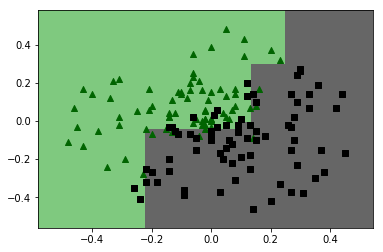

In [7]:
x_min, x_max = baseDados.X1.min() - .1, baseDados.X1.max() + .1
y_min, y_max = baseDados.X2.min() - .1, baseDados.X2.max() + .1
h = .005
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = RF.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = RF.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = ',')

<h2 style="text-align:center; margin:40px"> Ensembles - Gradient Boosting </h2>

![](img/gradientboosting.png)

O <b> Gradient Boosting </b> combina vários modelos simples (em geral árvores pequenas ou regressores lineares) para obter modelos mais complexos e com melhor performance.

O primeiro modelo é treinado normalmente, <b>o segundo tenta acertar o erro do primeiro</b> e assim sucessivamente. No final a resposta é obtida pela combinação de todos os modelos, que varia se o problema for de classificação ou regressão.

<h3><font color="red">Atenção:</font> Como cada modelo tenta acertar o erro do anterior, existe uma dependência que inviabiliza a paralelização do treinamento. Por conta disto, o treinamento do Gradient Boosting costuma ser <font color="red">bem mais lento</font> que o de uma Random Forest</h3>

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn). Iremos ver como a escolha dos parâmetros é <b>muito</b> importante para o resultado do algoritmo.

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
GB = GradientBoostingClassifier(learning_rate=0.5, max_depth=2, n_estimators=10)
X = baseDados.loc[:, baseDados.columns != 'Y']
Y = baseDados.Y
GB.fit(X,Y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

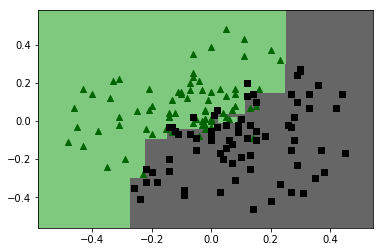

In [10]:
x_min, x_max = baseDados.X1.min() - .1, baseDados.X1.max() + .1
y_min, y_max = baseDados.X2.min() - .1, baseDados.X2.max() + .1
h = .005
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = GB.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = GB.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = ',')

<h2 style="text-align:center; margin:40px"> Máquinas de Vetores de Suporte (SVM) </h2>

![](img/svm.png)

O algoritmo de <b>SVM</b> tem como objetivo encontrar a <b>superfície separadora (hiperplano) que maximiza a distância entre as margens</b> (retas tracejadas). Isso permite separar as duas classes da melhor maneira possível.

<h4> Equação do Plano (2D): $ax + by + c = 0$ </h4>

<h4> Podemos re-escrever como: $w_1x_1 + w_2x_2 + b = 0$ </h4>

<h4> Equação do Plano (m dimensões): $w \cdot x + b = 0$ </h4>

<h4> As duas margens são dadas por: $w \cdot x + b = \pm1$ </h4>

<h4> Distância entre as margens: $d = \frac{2}{||w||}$ </h4>

<h4> Então nosso objetivo é:<br/>$\min_{w}{||w||}$ <br/>sujeito a $y_i (w \cdot x_i + b) >= 1$</h4>

<h4> Para permitir pequenos erros, adicionamos variáveis de folga:
<br/>$\min_{w,\eta}{||w||} + C\sum{\eta_i}$ <br/>sujeito a $y_i (w \cdot x_i + b) >= 1 - \eta_i$</h4>

<h3 style="text-align:center; margin:40px"> E se não houver separação linear entre as duas classes? </h3>

<h4>Kernel Trick</h4>
É o nome dado para uma técnica que envolve mapear os dados para um espaço diferente, geralmente de dimensão mais alta, de forma que neste espaço os dados sejam linearmente separáveis. Ou seja, substituímos cada $x_i$ por $\phi(x_i)$

![](img/kernel1.png)

<h4> O novo espaço pode ter dimensão infinita! </h4>
Não precisamos de fato mapear os pontos no novo espaço! Para resolver o SVM, basta conhecer o produto escalar das observações no novo espaço, ou seja, o resultado de $\phi(x_i)\cdot\phi(x_j)$, que geralmente chamamos de <b>Kernel</b>:

$K(x_i, x_j) = \phi(x_i)\cdot\phi(x_j)$

<h4> Principais kernels: </h4>
<ul>
    <li>Linear: $K(x_i, x_j) = x_i \cdot x_j$</li>
    <li>Polinomial: $K(x_i, x_j) = (\delta(x_i \cdot x_j) + k)^d$</li>
    <li>Gaussiano: $K(x_i, x_j) = e^{-\gamma||x_i-x_j||^2}$</li>
    <li>Sigmoidal: $K(x_i, x_j) = tanh(\delta(x_i \cdot x_j) + k)$</li>
</ul>

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn). Iremos ver como a escolha do <b>kernel</b> e dos parâmetros é <b>muito</b> importante para o resultado do algoritmo.

In [11]:
from sklearn.svm import SVC

In [12]:
SVM = SVC(kernel = 'linear', C = 1)
X = baseDados.loc[:, baseDados.columns != 'Y']
Y = baseDados.Y
SVM.fit(X,Y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

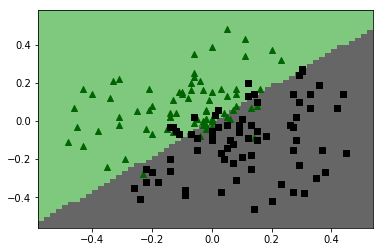

In [13]:
x_min, x_max = baseDados.X1.min() - .1, baseDados.X1.max() + .1
y_min, y_max = baseDados.X2.min() - .1, baseDados.X2.max() + .1
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = SVM.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = ',')